# Data engineering Healthcare Project
---
### Data Analysis 

In this notebook, we analyze the provided datasets and compare three database systems.
We also motivate our final database choice based on the structure and properties of the data.

### 1. Importing Our Tools (Libraries) & Loading Data
We will use pandas for data manipulation, and matplotlib and seaborn for creating charts. This is the standard and most effective toolkit for this kind of analysis in Python. After importing, we load our six pre-cleaned CSV files into pandas DataFrames.

* import pandas as pd: We use pandas to work with data tables (like spreadsheets). It lets us load our data from CSV files into something called a DataFrame. Think of a DataFrame as a smart table where we can easily sort, filter, and work with our data.
* Why pandas? Why not just use Python's built-in lists or dictionaries? While we could use basic Python to handle the data, it would be much harder. We would have to write a lot more code to do simple things like calculating the average of a column. pandas is the standard tool for data analysis in Python because it's powerful and easy to use for table-like data.
* import numpy as np: numpy is a library for working with numbers and math. pandas actually uses numpy behind the scenes. We import it directly because it's a good habit and sometimes we need it for special math operations.
* import matplotlib.pyplot as plt and import seaborn as sns: These two libraries are used for making charts and graphs (visualizations). Pictures help us understand the data much better than just looking at numbers.
* Why use two plotting libraries? matplotlib is the original, foundational plotting library. It can make almost any chart, but it can sometimes take a lot of code to make it look good. seaborn is built on top of matplotlib and makes it much easier to create beautiful and common statistical plots (like bar charts and heatmaps) with less code. We use them together to get the best of both worlds.

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### 2. Loading the Data Files
Now we use the pandas library, which we called pd, to load our six CSV files. Each file contains a different piece of the healthcare puzzle. We give each one a unique name so we can work with it separately.

Our teammate already cleaned the data a little bit with general functions

In [11]:
observations = pd.read_csv("../cleaned_data/observations_cleaned.csv")
patients = pd.read_csv("../cleaned_data/patients_cleaned.csv")
procedures = pd.read_csv("../cleaned_data/procedures_cleaned.csv")

diagnoses = pd.read_csv("../cleaned_data/diagnoses_cleaned.csv")
encounters = pd.read_csv('../cleaned_data/encounters_cleaned.csv')
medications = pd.read_csv('../cleaned_data/medications_cleaned.csv')

### 3. Making a Smart Plan: The Reusable Analysis Function
We have six different data files to check. We could copy and paste our analysis code six times, but that's a bad idea.
* The wrong way (the alternative): If we copied and pasted the code, our notebook would be very long and repetitive. Even worse, if we found a mistake or wanted to add a new chart, we would have to fix it in all six places! It's easy to make a mistake this way.
* The right way (our implementation): We create a single, reusable function called analyze_dataframe. Think of it like a recipe. We write the steps for our analysis once inside this function. Then, for each data file, we just "call" the function. This is cleaner, safer, and much easier to manage.

#### What's Inside Our "Recipe"?
Our function will automatically perform a standard check-up on any DataFrame we give it:
1. .shape, .head(), .info(): These commands give us a quick first look. We see how many rows and columns there are, what the first few rows look like, and what kind of data is in each column (e.g., numbers, text, dates).
2. .isnull().sum(): This checks for missing data. Missing values can cause errors, so we need to know where they are.
3. .describe(include='all'): This gives us statistics. For number columns, it shows the average, min, max, etc. By adding include='all', we tell it to also give us information about text columns, like how many unique text values there are.
4. Visualizations (Charts): We create a few standard charts to help us "see" the data.
* Histograms for numbers: This is the best way to see the distribution or "shape" of numerical data. It shows us if most values are low, high, or spread out evenly.
* Bar charts for text: This is perfect for counting how many times each item in a category appears.
* Why not a pie chart? Pie charts can be hard to read if there are more than two or three categories. It's difficult for our eyes to compare the size of slices. Bar charts are almost always easier to understand and compare.
* Safety Check (if df[col].nunique() < 20): We only create bar charts for text columns with fewer than 20 unique categories. Why? Imagine trying to create a bar chart for a "patient_name" column with 1000 names. It would be a giant, unreadable mess. This check prevents that and keeps our analysis useful.


In [12]:
def analyze_dataframe(df, filename):
    """
    Performs and prints a full analysis for a given DataFrame,
    including data visualizations.
    """
    print("-" * 50)
    print(f"ANALYSIS FOR: {filename}")
    print("-" * 50)
    
    # Shape
    print(f"\n[INFO] Shape of the dataset (rows, columns): {df.shape}\n")
    
    # Head
    print("[INFO] First 5 rows of the dataset:")
    print(df.head())
    print("\n" + "-" * 30 + "\n")
    
    # Info
    print("[INFO] Technical Information (Data Types and Non-Null Counts):")
    df.info()
    print("\n" + "-" * 30 + "\n")

    # Missing Values
    print("[INFO] Count of Missing (Null) Values per Column:")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values found.")
    else:
        print(missing_values[missing_values > 0])
    print("\n" + "-" * 30 + "\n")

    # Descriptive Statistics
    print("[INFO] Descriptive Statistics for All Columns:")
    print(df.describe(include='all'))
    print("\n\n")
    
    # VISUALIZATIONS
    print("-" * 50)
    print(f"VISUALIZATIONS FOR: {filename}")
    print("-" * 50)

    # Missing Value Heatmap
    if df.isnull().sum().sum() > 0:
        plt.figure(figsize=(12, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
        plt.title(f'Missing Value Heatmap for {filename}')
        plt.show()
    
    # Histograms for Numerical Columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 0:
        print(f"\n[VISUAL] Histograms for Numerical Columns in {filename}:")
        df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(-1, 3))
        plt.tight_layout()
        plt.show()
    
    # Count Plots for Categorical Columns
    # We only plot categorical columns with a reasonable number of unique values (< 20)
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"\n[VISUAL] Count Plots for Key Categorical Columns in {filename}:")
        for col in categorical_cols:
            if df[col].nunique() < 20:
                plt.figure(figsize=(10, 5))
                sns.countplot(y=col, data=df, order=df[col].value_counts().index)
                plt.title(f'Count of each category in: {col}')
                plt.xlabel('Count')
                plt.ylabel(col)
                plt.tight_layout()
                plt.show()
    
    print("\n\n")

 ---
### 2. Dataset-Specific Analysis
Patients Dataset
Summary: This is the master table for patient demographic data. It contains Personally Identifiable Information (PII) like names, addresses, and birth dates, which is a major consideration for data security (GDPR). The data is high quality with no missing values. The date_of_birth column is stored as a string (object) and will require transformation into a proper date type for age calculations. The patient_id column serves as the primary key to link to all other datasets.

--------------------------------------------------
ANALYSIS FOR: Oberservations
--------------------------------------------------

[INFO] Shape of the dataset (rows, columns): (886, 9)

[INFO] First 5 rows of the dataset:
                           encounter_id observation_code observation_datetime  \
0  f5f83a54-5883-413d-9bb4-c859fa6b8cde           4548-4           2025-04-14   
1  f5f83a54-5883-413d-9bb4-c859fa6b8cde           2345-7           2025-04-14   
2  f5f83a54-5883-413d-9bb4-c859fa6b8cde           2160-0           2025-04-14   
3  a4345130-e167-45b5-9e60-75a1815d3ae0           8480-6           2026-04-08   
4  a4345130-e167-45b5-9e60-75a1815d3ae0           8462-4           2026-04-08   

                    observation_description  \
0  Hemoglobin A1c/Hemoglobin.total in Blood   
1                        Glucose [Mass/Vol]   
2                     Creatinine [Mass/Vol]   
3                   Systolic blood pressure   
4                  Diastolic blood pressure   

       

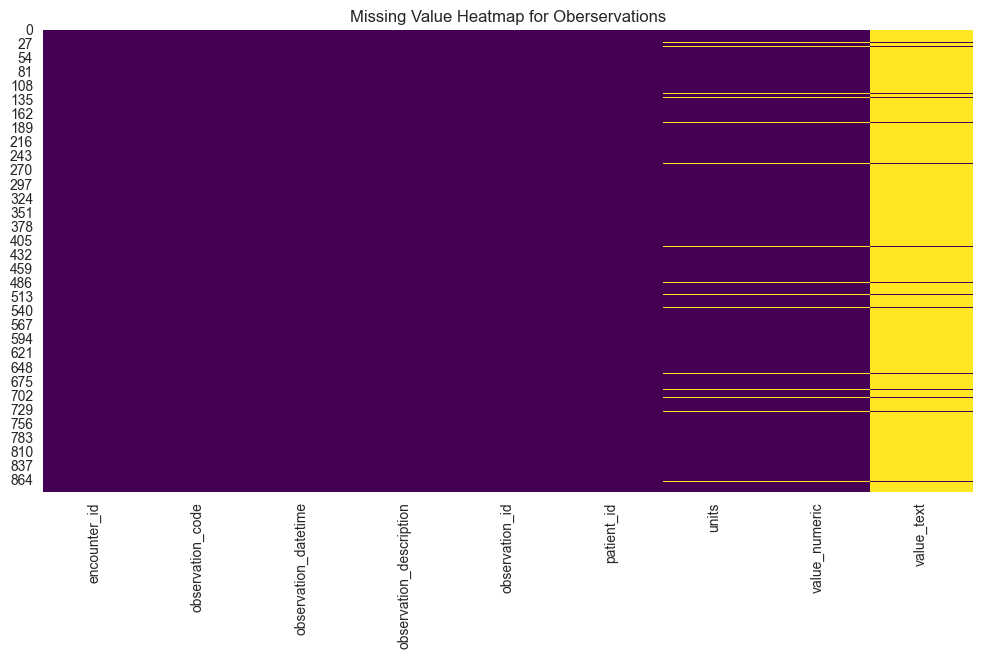


[VISUAL] Histograms for Numerical Columns in Oberservations:


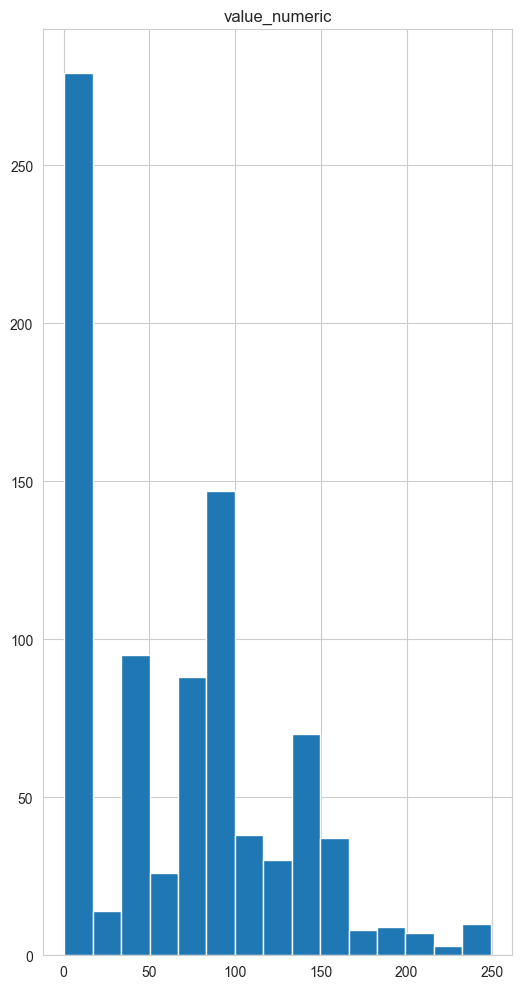


[VISUAL] Count Plots for Key Categorical Columns in Oberservations:


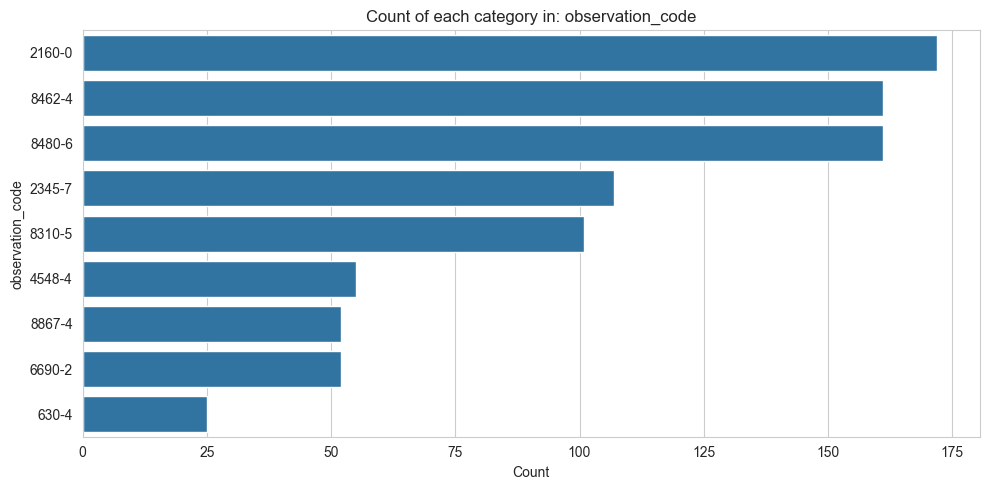

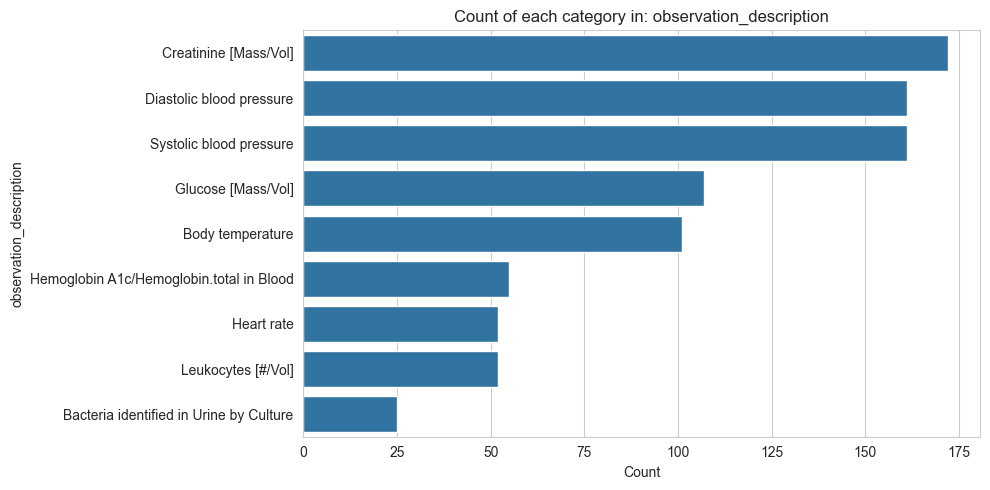

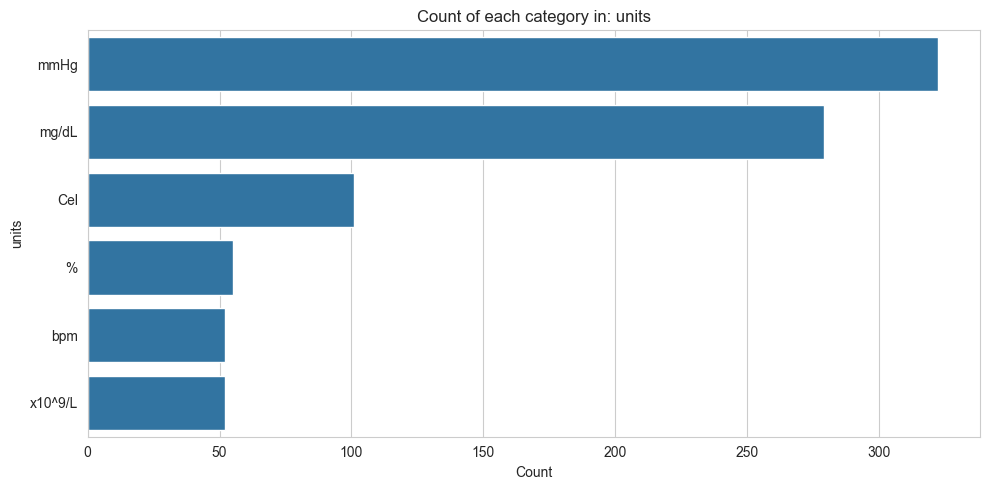

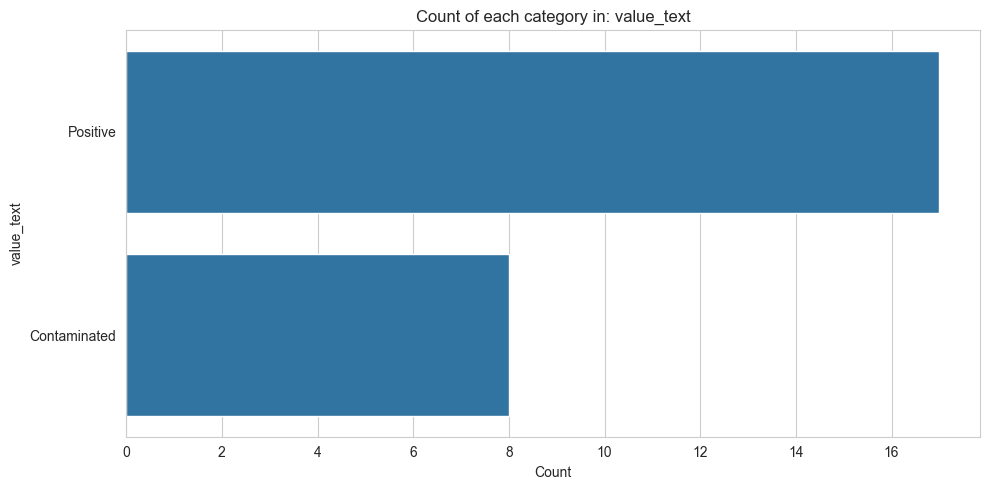

In [13]:
analyze_dataframe(observations, 'Oberservations')

#### Deeper Analysis & Commentary: Observations
* Structure and Keys: With 886 rows and 9 columns, this is a "tall" table, which is typical for transactional or event-based data like lab results. The observation_id column is unique for every single row, which makes it the Primary Key for this table. This means we can use this ID to refer to a specific, unique observation. patient_id and encounter_id are Foreign Keys, linking each observation back to a patient and a specific visit.
* Data Types - A Critical Finding: The observation_datetime column is stored as an object (text), not a proper date type. This is a crucial finding. For our database, we must store this as a DATETIME or TIMESTAMP type. This allows for correct sorting, filtering by date ranges, and calculating time differences, which is impossible with text.
* Missing Value Pattern: This is very insightful. units and value_numeric are both missing 25 values. Meanwhile, value_text contains exactly 25 non-null values. This tells a clear story: an observation is either a number (with units) OR it's a text value (like "Positive" or "Negative"). This is actually a good, clean data structure. Our database design should probably have a value_numeric column and a value_text column to reflect this.
* Content Insights:
* The dataset contains results for only 9 unique types of observations. The most common are lab tests like 'Creatinine' and 'Hemoglobin A1c', as well as blood pressure readings.
* These observations belong to 150 unique patients, which matches the total number of patients in our patients table.

--------------------------------------------------
ANALYSIS FOR: Patients
--------------------------------------------------

[INFO] Shape of the dataset (rows, columns): (150, 10)

[INFO] First 5 rows of the dataset:
                        address                   city date_of_birth  \
0     26236 Nunez Road Apt. 527           Sharpchester    1985-01-11   
1           90829 Thomas Summit  East Christophermouth    1981-12-11   
2             3939 Sarah Ridges           Jeffreyburgh    1950-12-17   
3             5559 Walton Inlet             West Holly    1963-01-22   
4  4609 Reginald Plaza Apt. 985              Megantown    1943-01-06   

  first_name  gender last_name                            patient_id  \
0       Juan    Male  Calderon  ea3a68f6-ecf9-46aa-be97-7ecbfc7e7fcb   
1       Paul    Male     Price  0eeb5541-d0b3-47fe-839c-a2227526b751   
2      Julie  Female     Brown  83f30300-2873-49f7-8fe4-06903a75db73   
3      Sarah  Female    Dillon  3a707a9a-00b9-40f1-90bf-1a4ff

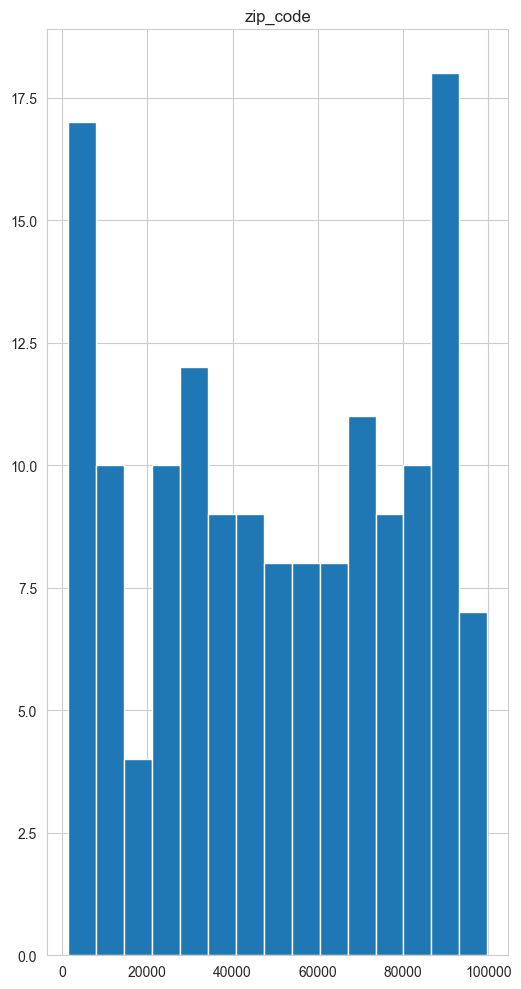


[VISUAL] Count Plots for Key Categorical Columns in Patients:


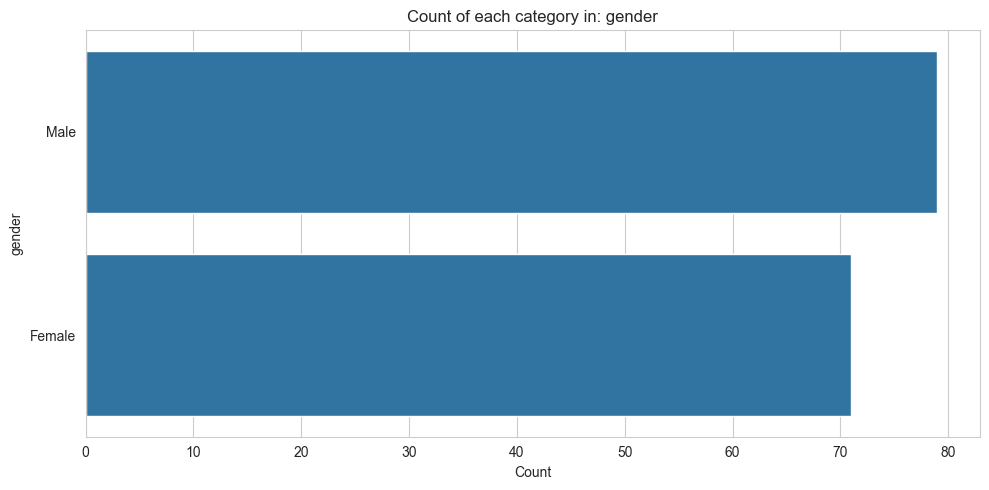

In [14]:
analyze_dataframe(patients, 'Patients')

#### Deeper Analysis & Commentary: Patients
* Structure and Keys: This is our central "master" table for patients. With 150 rows and 10 columns, each row represents one unique person. The patient_id column has 150 unique values, confirming it is the Primary Key. All other tables will link to this one using patient_id.
* Data Quality: The data quality is excellent, with no missing values. This is great, but in a real-world scenario, this is rare.
* Data Types - Important for Engineering:
* Just like in the previous table, date_of_birth is an object (text). This MUST be converted to a DATE type in our final database. This is essential for correctly calculating patient ages.
* zip_code is stored as an int64 (a number). This is generally acceptable, but it's often better practice to store codes like this as text (VARCHAR in a database). This prevents issues like dropping leading zeros (e.g., '07039' becoming '7039') and makes it clear that we shouldn't perform mathematical operations (like calculating the average) on them.
* Content Insights:
* The data contains sensitive, Personally Identifiable Information (PII) like names, addresses, and phone numbers. This has huge implications for our data engineering. The database and any applications built on it must have strong security measures, including encryption and access controls, to comply with privacy laws like GDPR and HIPAA.
* The gender split is almost 50/50 (79 Male vs. 71 Female).
* The most common last name is 'Smith', which is a common feature of synthetically generated data.

--------------------------------------------------
ANALYSIS FOR: Procedures
--------------------------------------------------

[INFO] Shape of the dataset (rows, columns): (54, 6)

[INFO] First 5 rows of the dataset:
  date_performed                          encounter_id  \
0     2026-04-08  a4345130-e167-45b5-9e60-75a1815d3ae0   
1     2000-06-21  946bb28d-741a-4e03-8a1f-7a8d96e75a4e   
2     2024-03-08  c0736418-c4a8-4201-8c4c-0b24c923886f   
3     2025-07-03  4dd9bf3c-3308-45a2-91cb-92f59842abff   
4     2008-10-14  a63d2106-a907-42c8-9f4a-7124eeeed185   

                             patient_id  procedure_code  \
0  ea3a68f6-ecf9-46aa-be97-7ecbfc7e7fcb           90686   
1  83f30300-2873-49f7-8fe4-06903a75db73           90686   
2  5b2fa6df-d688-44cd-9c4a-9016eeb2989d           92014   
3  5b2fa6df-d688-44cd-9c4a-9016eeb2989d           90686   
4  2b091a02-499d-498e-8f35-e5f6c24d54d3           92014   

                               procedure_description  \
0              Influen

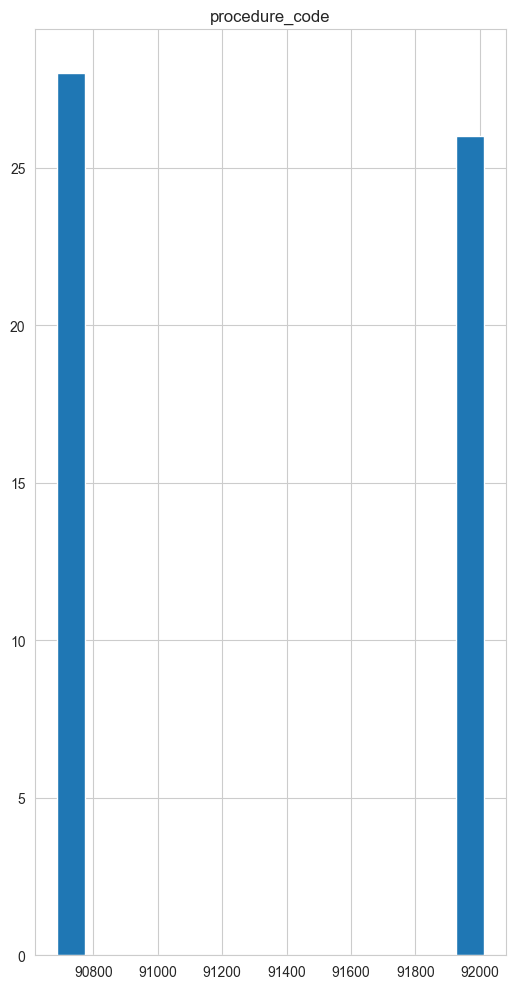


[VISUAL] Count Plots for Key Categorical Columns in Procedures:


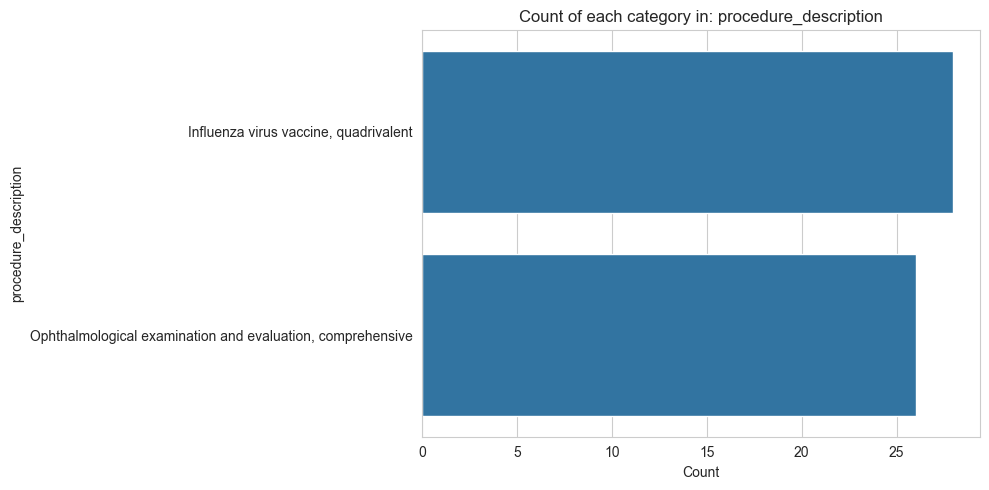

In [15]:
analyze_dataframe(procedures, 'Procedures')

#### Deeper Analysis & Commentary: Procedures
* Structure and Scope: This is a very small table with only 54 records. This tells us that either procedures are rare events for this patient group, or the dataset is limited in scope.
* Data Types: Once again, date_performed is an object (text) and must be converted to a DATE or DATETIME type in the database.
* Content Insights:
* The most striking observation is that there are only 2 unique procedures in the entire dataset: "Influenza virus vaccine, quadrivalent" and "Ophthalmological examination...". This is a very limited set. This means we cannot use this data to analyze a wide range of surgical or medical procedures.
* 50 unique patients are represented, with one patient having had 2 procedures.
* The procedure_id is the Primary Key for this table as it's unique for every row.

--------------------------------------------------
ANALYSIS FOR: Diagnoses
--------------------------------------------------

[INFO] Shape of the dataset (rows, columns): (221, 6)

[INFO] First 5 rows of the dataset:
                           diagnosis_id                          encounter_id  \
0  88003dd7-1a8a-4afd-9eec-79771380ccea  f5f83a54-5883-413d-9bb4-c859fa6b8cde   
1  013e1dc7-a966-4713-858f-7fa46b563876  a4345130-e167-45b5-9e60-75a1815d3ae0   
2  07f7e332-3e04-4874-b240-f62dbb27f179  096a1b40-bc37-43e6-a843-a224fd24aec0   
3  001dcfff-c215-42b2-840f-fb8d7430f8f6  946bb28d-741a-4e03-8a1f-7a8d96e75a4e   
4  49c86069-8554-4c80-90d3-f7fd5b4b27ad  f2641949-b626-4f7e-89a3-e981d865ccbe   

                             patient_id diagnosis_code  \
0  ea3a68f6-ecf9-46aa-be97-7ecbfc7e7fcb          E11.9   
1  ea3a68f6-ecf9-46aa-be97-7ecbfc7e7fcb         Z00.00   
2  0eeb5541-d0b3-47fe-839c-a2227526b751            I10   
3  83f30300-2873-49f7-8fe4-06903a75db73         Z00.00   
4  3a

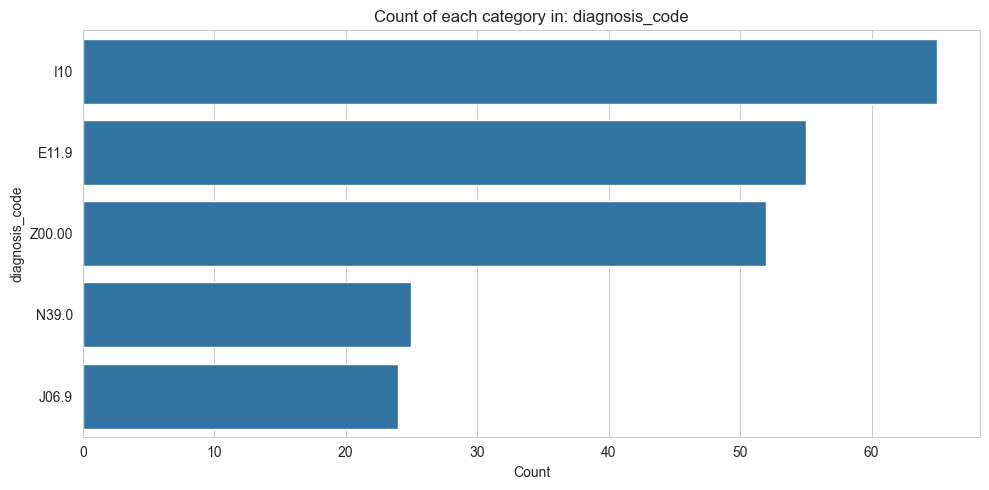

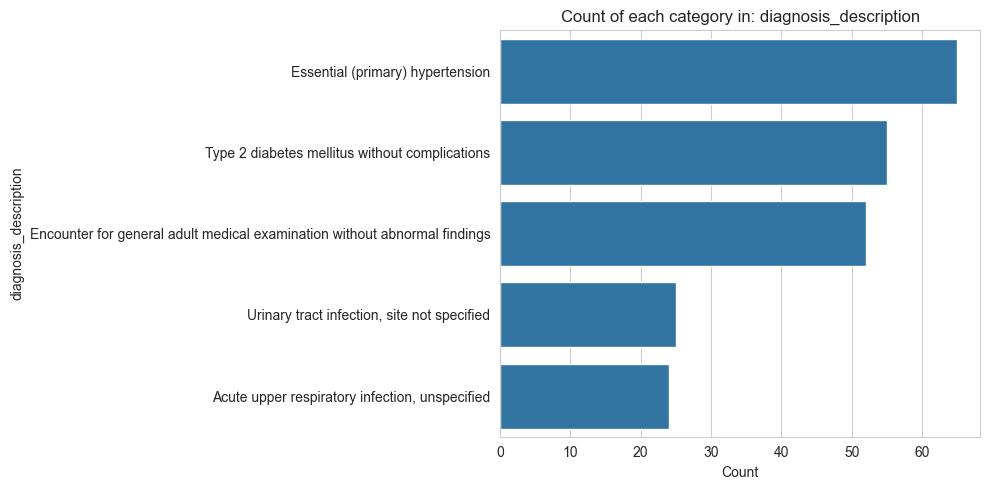

In [16]:
analyze_dataframe(diagnoses, 'Diagnoses')

#### Deeper Analysis & Commentary: Diagnoses
* Structure: With 221 records for 150 patients, it's clear that patients can have more than one diagnosis, which is expected.
* Data Types: date_recorded is an object and should be converted to a DATE type.
* Content Insights:
* Similar to procedures, the scope is very limited. There are only 5 unique diagnoses.
* The most common diagnosis is 'Essential (primary) hypertension' (high blood pressure), appearing 65 times. The next most common is 'Type 2 diabetes mellitus'. This gives us a very clear picture of the primary health concerns of this patient population. This aligns with the 'Metformin' medication we might see later.
* diagnosis_id is the Primary Key. encounter_id is also unique for every row, suggesting that in this dataset, only one diagnosis is recorded per encounter.

--------------------------------------------------
ANALYSIS FOR: Encounters
--------------------------------------------------

[INFO] Shape of the dataset (rows, columns): (291, 6)

[INFO] First 5 rows of the dataset:
  admission_date attending_physician_id discharge_date  \
0     2025-04-12                 DR_155     2025-04-12   
1     2026-04-08                 DR_116     2026-04-08   
2     2008-09-19                 DR_114     2008-09-19   
3     2008-12-14                 DR_114     2008-12-14   
4     2000-06-21                 DR_138     2000-06-21   

                           encounter_id                            patient_id  \
0  f5f83a54-5883-413d-9bb4-c859fa6b8cde  ea3a68f6-ecf9-46aa-be97-7ecbfc7e7fcb   
1  a4345130-e167-45b5-9e60-75a1815d3ae0  ea3a68f6-ecf9-46aa-be97-7ecbfc7e7fcb   
2  096a1b40-bc37-43e6-a843-a224fd24aec0  0eeb5541-d0b3-47fe-839c-a2227526b751   
3  1560ec89-082a-47b4-951d-4e38cddee348  0eeb5541-d0b3-47fe-839c-a2227526b751   
4  946bb28d-741a-4e03-8a1f-

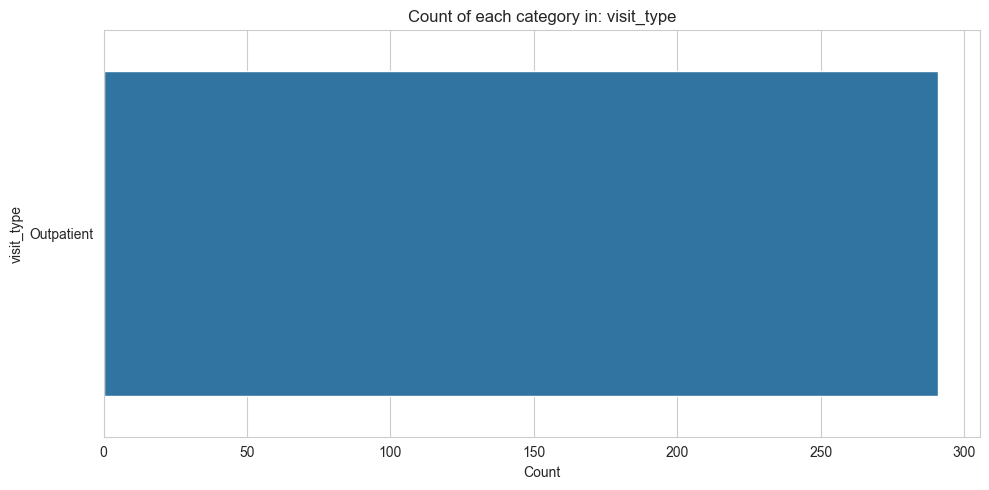

In [17]:
analyze_dataframe(encounters, 'Encounters')

#### Deeper Analysis & Commentary: Encounters
* Structure: This table acts as the "glue," with 291 unique visits linking patients to physicians and other events.
* Data Types: admission_date and discharge_date are both text (object) and need to be converted to DATETIME types. This would allow us to calculate the duration of a visit.
* The Most Important Finding: The visit_type column is the most critical insight from this table. It has only one unique value: 'Outpatient'. This is a major constraint on our dataset. It means we have no data on hospitalizations, emergency room visits, or telehealth appointments. Any analysis or system we build must acknowledge that it is based purely on outpatient data.
* Content Insights:
* The dataset covers all 150 patients.
* There are 108 unique attending_physician_ids, indicating a fairly large number of doctors are involved.

--------------------------------------------------
ANALYSIS FOR: Medications
--------------------------------------------------

[INFO] Shape of the dataset (rows, columns): (160, 10)

[INFO] First 5 rows of the dataset:
                    medication_order_id                            patient_id  \
0  f6f51d0c-ed98-495c-82bb-ec3ece393089  ea3a68f6-ecf9-46aa-be97-7ecbfc7e7fcb   
1  d2f85e5d-5e96-4f71-b12c-727d83433640  0eeb5541-d0b3-47fe-839c-a2227526b751   
2  6060eb06-6985-4752-99cd-44ff31005816  3a707a9a-00b9-40f1-90bf-1a4ff74fcb61   
3  c8eeda45-1951-424b-8075-9fb1e5a384e3  825e3f21-ca2a-442a-8d95-7f3dd64c3c6a   
4  a3520def-bee2-415b-ba61-fd0a06f063f2  825e3f21-ca2a-442a-8d95-7f3dd64c3c6a   

                           encounter_id  drug_code  \
0  f5f83a54-5883-413d-9bb4-c859fa6b8cde     860975   
1  096a1b40-bc37-43e6-a843-a224fd24aec0     203521   
2  f2641949-b626-4f7e-89a3-e981d865ccbe     829043   
3  ba3efbc1-cfcc-4832-a55c-6252682dd896     197361   
4  4d5bc738-8c6d-4ced-

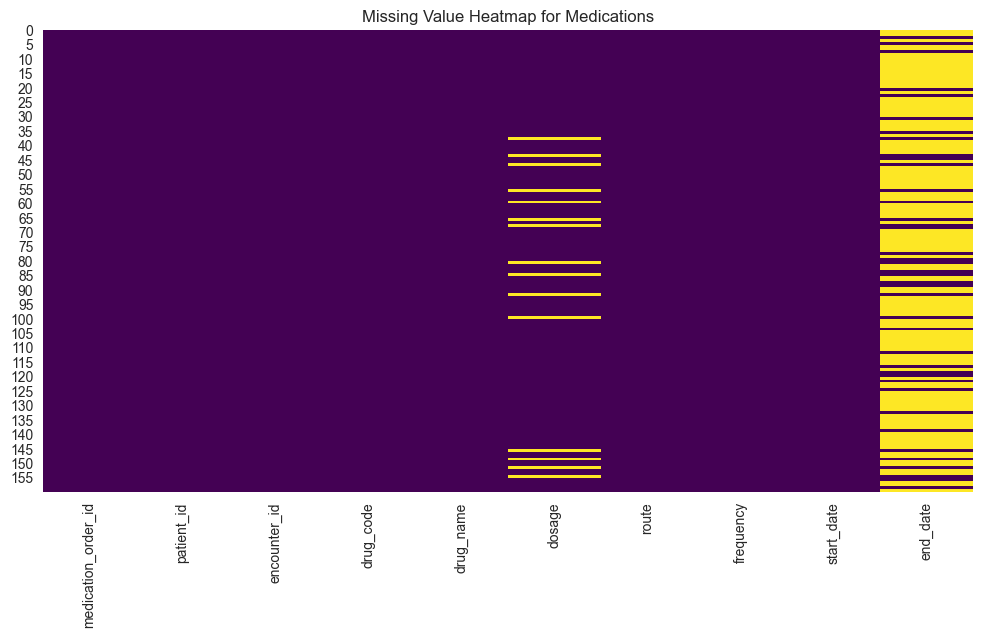


[VISUAL] Histograms for Numerical Columns in Medications:


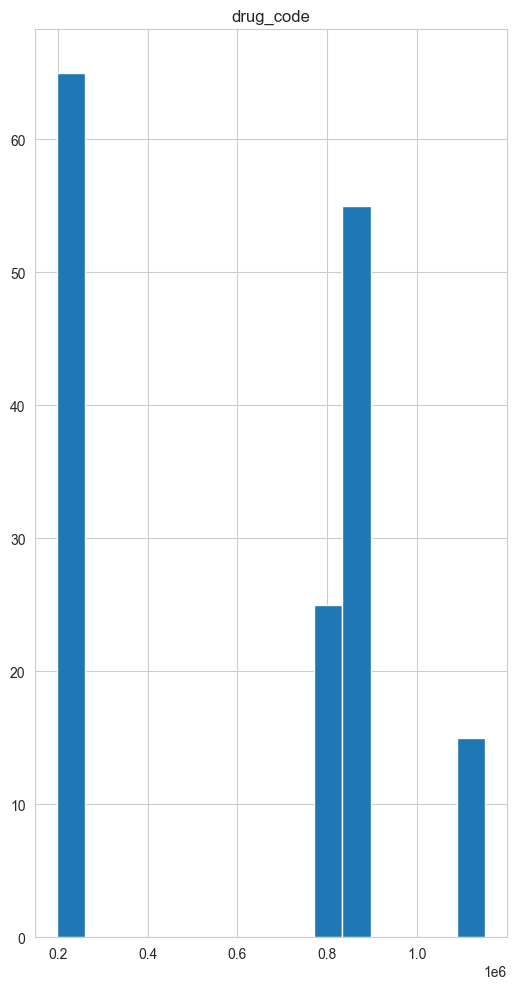


[VISUAL] Count Plots for Key Categorical Columns in Medications:


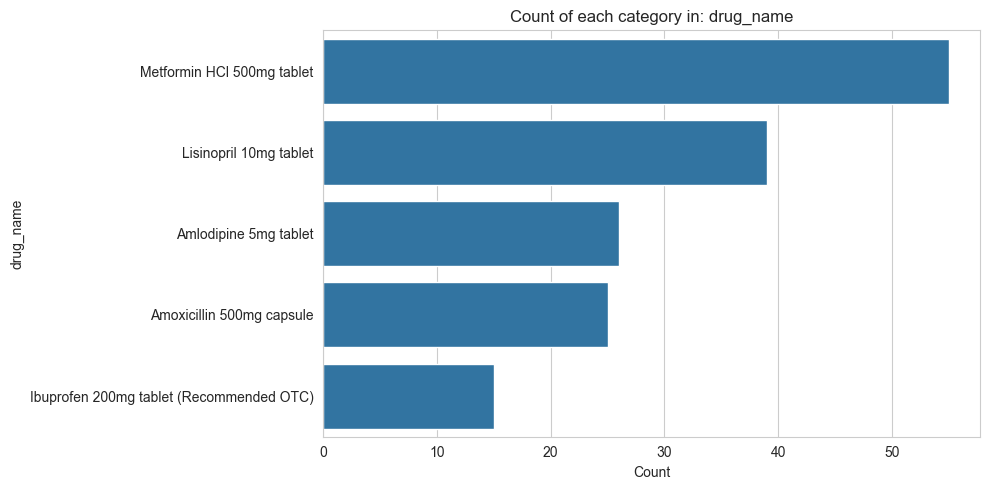

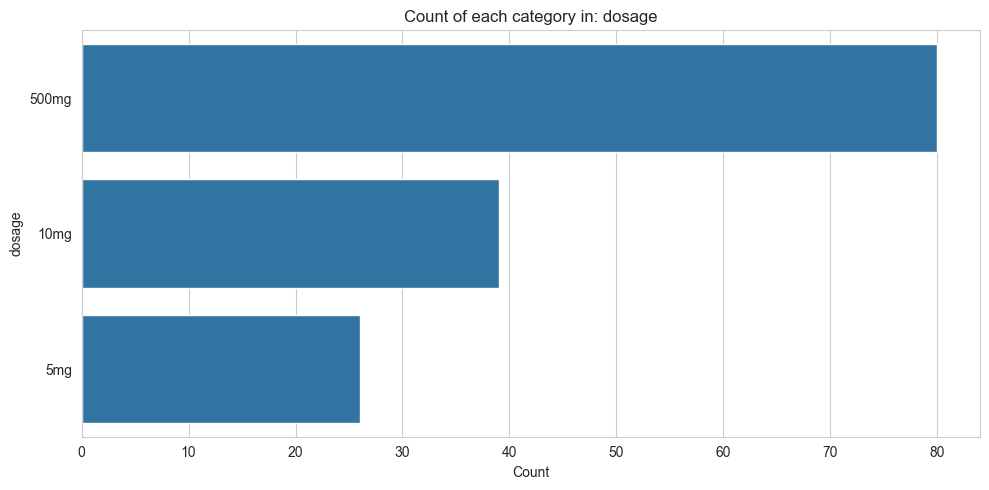

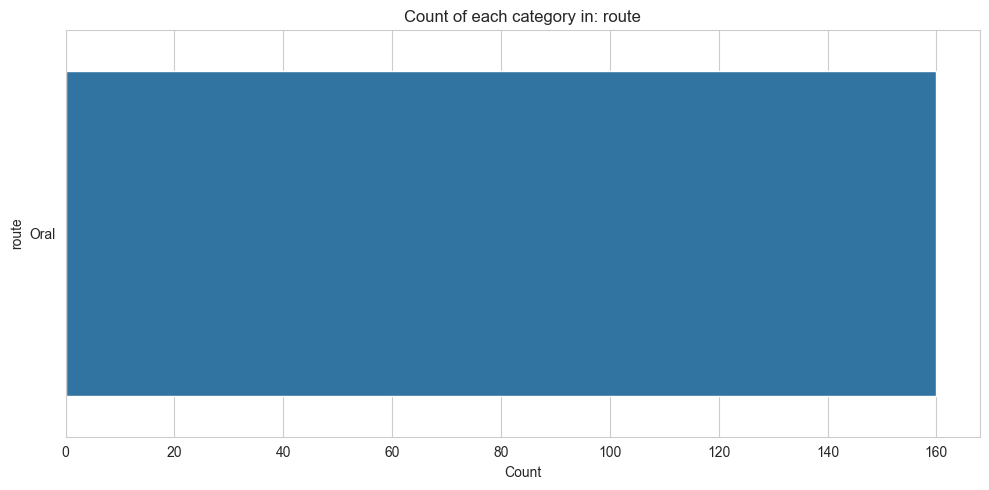

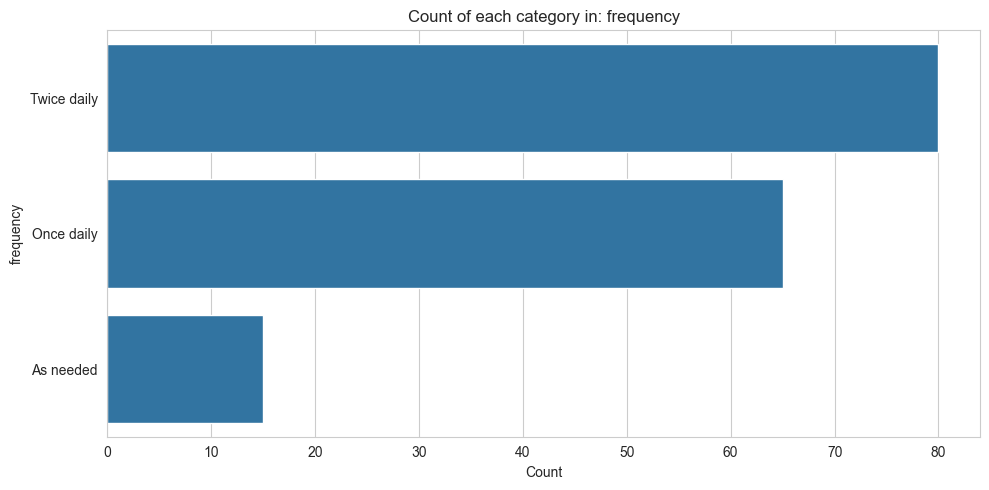

In [18]:
analyze_dataframe(medications, 'Medications')

#### Deeper Analysis & Commentary: Medications
* Structure: 160 medication orders for 126 unique patients. This means not all patients in the dataset are on medication.
* Missing Values - A Key Story:
* end_date is missing for 120 of the 160 records (75%). This is not a data quality problem; it's a feature. It tells us that these are likely active, ongoing prescriptions. A null end_date means the patient is still supposed to be taking the medication. This is a critical business rule to build into our database logic.
* dosage is missing for 15 records. This, unlike the end_date, is likely a data quality issue that would need to be addressed in a real project.
* Data Types: start_date and end_date are text (object) and must be converted to DATE types.
* Content Insights:
* There are only 5 unique drugs. The most common is 'Metformin HCl 500mg tablet', a drug for diabetes. This, combined with our findings from the diagnoses table, confirms that diabetes and hypertension are the primary conditions managed in this dataset.
* All medications are taken 'Oral'-ly. There are no injections or other routes of administration. This further simplifies the nature of our data.